# Exploratory Data Analysis (EDA): Fitness Tracker Market

This notebook presents an exploratory analysis of a cleaned fitness tracker dataset.
All data preparation and cleaning steps were completed prior to this analysis.

The objective of this EDA is to:
- Understand pricing patterns in the fitness tracker market
- Identify feature and brand-level drivers of price
- Translate numerical patterns into clear business insights

This notebook is intentionally narrative-driven and written for a non-technical audience,
including recruiters and business stakeholders.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("fitness_trackers_cleaned.csv")


## Dataset Overview

Each row in the dataset represents a unique fitness tracker or smartwatch model.
The dataset contains information related to pricing, product features, and user feedback.

Before analyzing relationships, we first examine the structure and scale of the data.


In [2]:
df.shape


(610, 11)

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Brand Name                      610 non-null    object 
 1   Device Type                     610 non-null    object 
 2   Model Name                      610 non-null    object 
 3   Color                           610 non-null    object 
 4   Selling Price                   610 non-null    int64  
 5   Original Price                  610 non-null    int64  
 6   Display                         610 non-null    object 
 7   Rating (Out of 5)               554 non-null    float64
 8   Strap Material                  610 non-null    object 
 9   Average Battery Life (in days)  610 non-null    int64  
 10  Reviews                         114 non-null    float64
dtypes: float64(2), int64(3), object(6)
memory usage: 52.6+ KB


## Selling Price Distribution

Selling price is the primary variable of interest, as it reflects brand positioning,
feature bundling, and consumer willingness to pay.

Understanding its distribution helps identify market segmentation and the presence
of premium products.


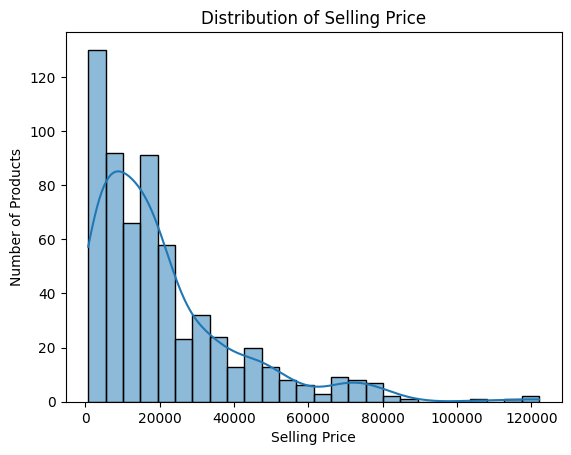

In [4]:
sns.histplot(df["Selling Price"], kde=True)
plt.title("Distribution of Selling Price")
plt.xlabel("Selling Price")
plt.ylabel("Number of Products")
plt.show()


### Interpretation

- The distribution of selling price is right-skewed
- Most products fall within a mid-price range
- A small number of products form a premium long tail

This indicates that the market is segmented rather than uniformly priced.
For analysis and modeling, the median selling price is more representative than the mean.


## Outlier Analysis

High-priced products may appear as outliers, but they can represent important
business segments such as flagship or premium devices.

Before removing any values, it is critical to understand what these outliers represent.


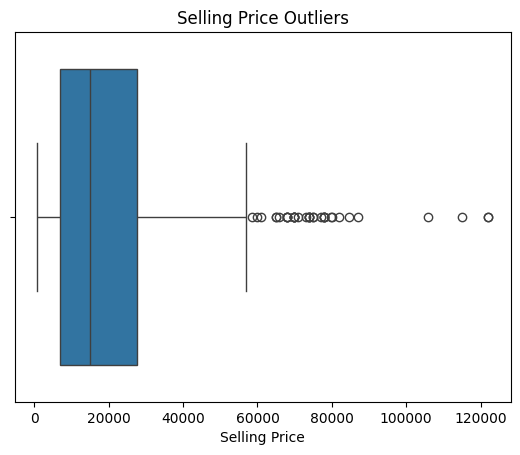

In [5]:
sns.boxplot(x=df["Selling Price"])
plt.title("Selling Price Outliers")
plt.show()


### Interpretation

- High-value outliers correspond to premium fitness trackers
- These products reflect real market behavior, not data errors

Outliers are retained, as removing them would eliminate meaningful information
about premium pricing strategies.


## Brand Presence in the Dataset

Brand distribution helps reveal market concentration and competitive dominance.
A higher number of products does not necessarily imply premium positioning,
but it does indicate visibility and market reach.


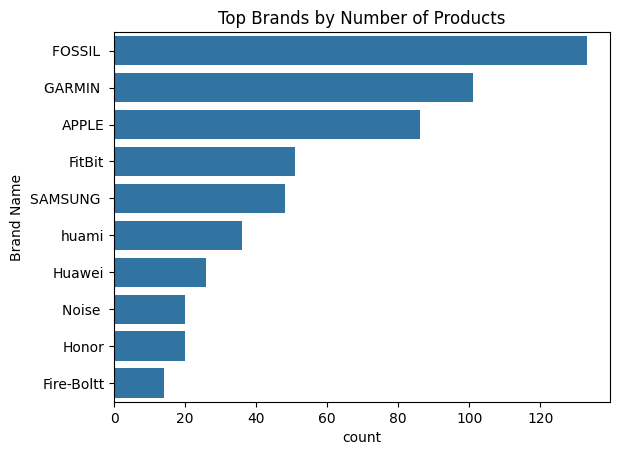

In [6]:
sns.countplot(
    y="Brand Name",
    data=df,
    order=df["Brand Name"].value_counts().index[:10]
)
plt.title("Top Brands by Number of Products")
plt.show()


### Interpretation

- A small number of brands dominate product availability
- Many brands appear only once or twice
- The market shows high concentration with a long tail of niche brands

Product count alone does not determine pricing power.


## Brand vs Selling Price

Analyzing selling price across brands reveals how companies position themselves
within budget, mid-range, and premium segments.


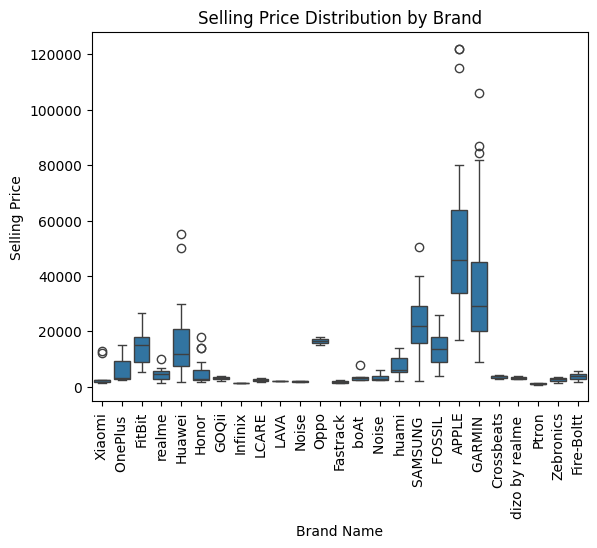

In [7]:
sns.boxplot(x="Brand Name", y="Selling Price", data=df)
plt.xticks(rotation=90)
plt.title("Selling Price Distribution by Brand")
plt.show()


### Interpretation

- Brands cluster into clear pricing segments
- Some brands maintain tight price ranges, indicating focused positioning
- Others show wide price variation, suggesting diversified portfolios

Brand identity is one of the strongest predictors of selling price.


## Battery Life vs Selling Price

Battery life is often marketed as a key feature.
This analysis evaluates whether longer battery life directly translates
into higher selling prices.


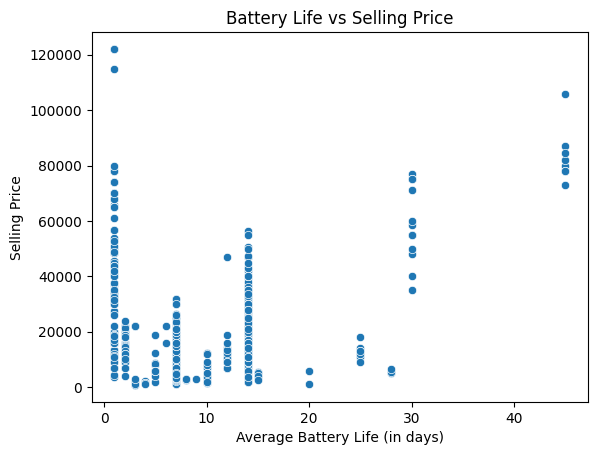

In [8]:
sns.scatterplot(
    x="Average Battery Life (in days)",
    y="Selling Price",
    data=df
)
plt.title("Battery Life vs Selling Price")
plt.show()


### Interpretation

- The relationship between battery life and selling price is weak
- Devices with longer battery life are not necessarily more expensive

Battery life appears to be a baseline expectation rather than a premium driver.


## Display Technology and Pricing

Display type influences perceived product quality and user experience.
This section evaluates how display technology impacts selling price.


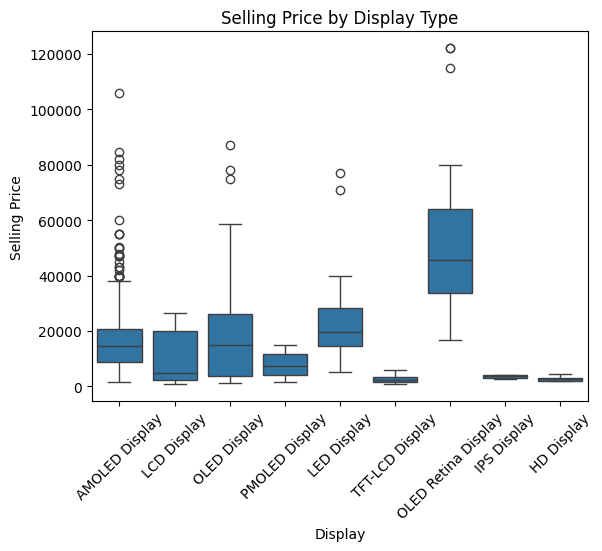

In [9]:
sns.boxplot(x="Display", y="Selling Price", data=df)
plt.xticks(rotation=45)
plt.title("Selling Price by Display Type")
plt.show()


### Interpretation

- AMOLED and OLED displays are consistently priced higher
- Display technology acts as a quality signal to consumers

This suggests feature signaling plays a major role in pricing.


## Final Summary

This exploratory analysis reveals a clearly segmented fitness tracker market:

- Pricing is strongly influenced by brand identity
- Display technology signals product value
- Battery life plays a secondary role
- Premium pricing reflects ecosystem and perception, not just specifications

The dataset is now well understood and ready for predictive modeling or deeper
business analysis.
